<img src="https://i.imgur.com/49FNOHj.jpg">

In [2]:
# find out how many different colour LEGO bricks are actually in production!
import pandas as pd

df = pd.read_csv("colors.csv")
df['name'].nunique()
#or
print(df.name.value_counts())

Unknown                1
Metal Blue             1
Bright Light Yellow    1
Rust                   1
Bright Light Blue      1
                      ..
Trans-Very Lt Blue     1
Trans-Neon Green       1
Trans-Light Blue       1
Trans-Black            1
[No Color]             1
Name: name, Length: 135, dtype: int64


In [3]:
# find number of transparent lego
df.is_trans.value_counts()
#or
df.groupby('is_trans').count()

trans_lego = df.is_trans.value_counts()
number_of_trasparent_legos = trans_lego['t']
print(f"Total number of trasparent legos are {number_of_trasparent_legos}")

Total number of trasparent legos are 28


In [4]:
sets = pd.read_csv("sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [5]:
# In which year were the first LEGO sets released and what were these sets called
oldest_set = sets.sort_values('year')
oldest_lego_year = oldest_set.loc[0,'year']
print(f"Year were the first LEGO sets released was {oldest_lego_year}")
lego_sets_from_oldest_year = oldest_set[oldest_set.year == oldest_lego_year]
lego_sets_from_oldest_year =  lego_sets_from_oldest_year['name']
lego_sets_from_oldest_year = lego_sets_from_oldest_year.to_string(index=False).split("\n")
oldest_lego_set = [lego_sets.strip() for lego_sets in lego_sets_from_oldest_year]
print(f"LEGO sets released in this year were: {oldest_lego_set}")

Year were the first LEGO sets released was 1965
LEGO sets released in this year were: ['Unused par\ufeffts sold by LEGO betwe\ufeffen 1945 and 1965', 'Tiles', '38 Slimbricks Assorted Sizes', '38 Slimbricks Assorted Sizes (The Building Toy)', 'Gears', 'Basic Building Set in Cardboard', '4.5V Samsonite Gears Motor Set', 'Basic Building Set in Cardboard', 'Small Cottage', 'Educational Box - Empty', 'Truck with Trailer', 'Clowns', 'Two-Engine Airplane']


In [6]:
# How many different products did the LEGO company sell in their first year of operation?
sets_sold_in_first_year = sets[sets.year == oldest_lego_year].set_num.to_string(index=False).split("\n")
sets_sold_in_first_year = [lego_sets.strip() for lego_sets in sets_sold_in_first_year]
print(f"Total different products sold in first year were: {len(sets_sold_in_first_year)} named: {sets_sold_in_first_year}")

Total different products sold in first year were: 13 named: ['001-1', '002-1', '005-1', '010-1', '319-1', '320-2', '321-1', '326-1', '409-1', '509-1', '510-2', '90-2', 'LEGO-Classic-1']


In [7]:
# What are the top 5 LEGO sets with the most number of parts

sets.sort_values('num_parts', ascending= False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


      set_num  name  theme_id  num_parts
year                                    
1949        5     5         5          5
1950        6     6         6          6
1953        4     4         4          4
1954       14    14        14         14
1955       28    28        28         28
...       ...   ...       ...        ...
2017      786   786       786        786
2018      816   816       816        816
2019      840   840       840        840
2020      674   674       674        674
2021        3     3         3          3

[71 rows x 4 columns]


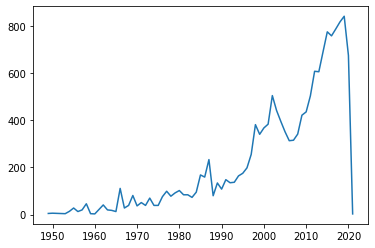

In [8]:
# create a new Series called sets_by_year which has the years as the index and the number of sets as the value and plot it
import matplotlib.pyplot as plt

sets_by_year = sets.groupby("year").count()
print(sets_by_year)

# plotting
plt.plot(sets_by_year.index, sets_by_year['set_num'])

In [12]:
# calculate the number of different themes by calendar year
theme_by_year = sets.groupby('year').agg({'theme_id':pd.Series.nunique})
print(theme_by_year)

# renaming theme_id with appropriate column name
theme_by_year.rename(columns = {'theme_id':'unique_themes'}, inplace = True)
print(theme_by_year)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]
      unique_themes
year               
1949              2
1950              1
1953              2
1954              2
1955              4
...             ...
2017             89
2018             93
2019             78
2020             82
2021              1

[71 rows x 1 columns]


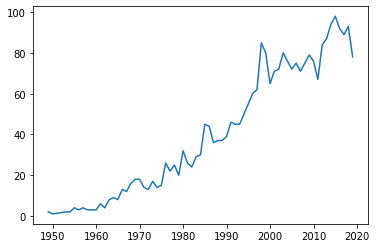

In [14]:
# Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1949 to 2019)
plt.plot(theme_by_year.index[:-2], theme_by_year['unique_themes'][:-2])

Text(0, 0.5, 'Number of Themes')

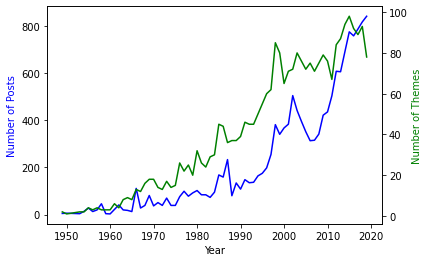

In [19]:
# plot the number of themes and the number sets on the same chart
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color = 'b')
ax2.plot(theme_by_year.index[:-2], theme_by_year['unique_themes'][:-2], 'g')

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Posts", color = "Blue")
ax2.set_ylabel("Number of Themes", color = "Green")

In [20]:
# Create a Pandas Series called parts_per_set that has the year as the index and contains the average number of parts per LEGO set in that year
parts_per_set = sets.groupby('year').agg({'num_parts':pd.Series.mean})
print(parts_per_set)

       num_parts
year            
1949   99.600000
1950    1.000000
1953   13.500000
1954   12.357143
1955   36.607143
...          ...
2017  221.840967
2018  213.618873
2019  207.510714
2020  259.732938
2021    0.000000

[71 rows x 1 columns]


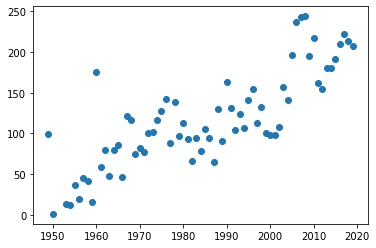

In [22]:
# generate the scatter plot chart
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])

In [61]:
# count the number of sets per Theme
themes = pd.read_csv("themes.csv")
themes

sets_per_theme = sets["theme_id"].value_counts()
sets_per_theme = pd.DataFrame({"id":sets_per_theme.index, "unique_sets_per_theme":sets_per_theme.values})

merged_df = pd.merge(sets_per_theme, themes, on='id')
merged_df

,id,unique_sets_per_theme,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


<BarContainer object of 50 artists>

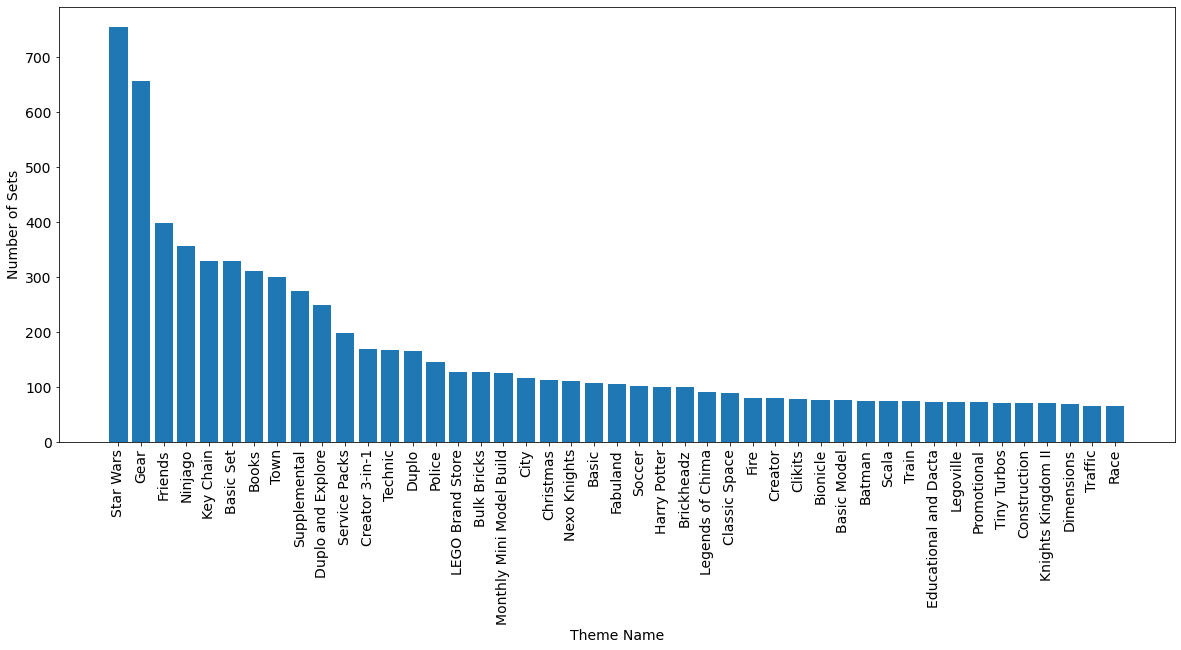

In [73]:
# Creating a Bar Chart for above data

plt.figure(figsize=(20,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Number of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:50], merged_df.unique_sets_per_theme[:50],width=0.8)